In [4]:
# Imports
import pandas as pd
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import neighbors
from sklearn import metrics
from sklearn import dummy
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
# Fichier source
data = pd.read_csv('winequality-red.csv', sep=";")

X = data.as_matrix(data.columns[:-1])
y = data.as_matrix([data.columns[-1]])
y = y.flatten()

print(X.shape)
print(y.shape)

(1599, 11)
(1599,)


In [6]:
# Séparation training/testing
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,test_size=0.3)

# Scaling
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [7]:
taille = 100

In [10]:
msq_random, msq_dum, msq_pred, r2_random, r2_dum, r2_pred = prediction(taille+1)

Pour n =  2
MSE aléatoire 		: 3.09
MSE valeur moyenne 	: 0.71
MSE prédiction 		: 0.57

R2 aléatoire 		: -3.43
R2 valeur moyenne 	: -0.01
R2 prédiction 		: 0.18

Pour n =  3
MSE aléatoire 		: 2.93
MSE valeur moyenne 	: 0.71
MSE prédiction 		: 0.56

R2 aléatoire 		: -3.19
R2 valeur moyenne 	: -0.01
R2 prédiction 		: 0.20

Pour n =  4
MSE aléatoire 		: 2.86
MSE valeur moyenne 	: 0.71
MSE prédiction 		: 0.54

R2 aléatoire 		: -3.09
R2 valeur moyenne 	: -0.01
R2 prédiction 		: 0.23

Pour n =  5
MSE aléatoire 		: 2.98
MSE valeur moyenne 	: 0.71
MSE prédiction 		: 0.53

R2 aléatoire 		: -3.26
R2 valeur moyenne 	: -0.01
R2 prédiction 		: 0.24

Pour n =  6
MSE aléatoire 		: 2.78
MSE valeur moyenne 	: 0.71
MSE prédiction 		: 0.52

R2 aléatoire 		: -2.98
R2 valeur moyenne 	: -0.01
R2 prédiction 		: 0.26

Pour n =  7
MSE aléatoire 		: 3.17
MSE valeur moyenne 	: 0.71
MSE prédiction 		: 0.50

R2 aléatoire 		: -3.54
R2 valeur moyenne 	: -0.01
R2 prédiction 		: 0.28

Pour n =  8
MSE aléatoire 		: 3.05

MSE prédiction 		: 0.49

R2 aléatoire 		: -3.63
R2 valeur moyenne 	: -0.01
R2 prédiction 		: 0.30

Pour n =  57
MSE aléatoire 		: 2.77
MSE valeur moyenne 	: 0.71
MSE prédiction 		: 0.49

R2 aléatoire 		: -2.97
R2 valeur moyenne 	: -0.01
R2 prédiction 		: 0.30

Pour n =  58
MSE aléatoire 		: 2.86
MSE valeur moyenne 	: 0.71
MSE prédiction 		: 0.49

R2 aléatoire 		: -3.10
R2 valeur moyenne 	: -0.01
R2 prédiction 		: 0.30

Pour n =  59
MSE aléatoire 		: 2.87
MSE valeur moyenne 	: 0.71
MSE prédiction 		: 0.49

R2 aléatoire 		: -3.11
R2 valeur moyenne 	: -0.01
R2 prédiction 		: 0.30

Pour n =  60
MSE aléatoire 		: 3.04
MSE valeur moyenne 	: 0.71
MSE prédiction 		: 0.49

R2 aléatoire 		: -3.35
R2 valeur moyenne 	: -0.01
R2 prédiction 		: 0.30

Pour n =  61
MSE aléatoire 		: 3.21
MSE valeur moyenne 	: 0.71
MSE prédiction 		: 0.49

R2 aléatoire 		: -3.60
R2 valeur moyenne 	: -0.01
R2 prédiction 		: 0.30

Pour n =  62
MSE aléatoire 		: 2.94
MSE valeur moyenne 	: 0.71
MSE prédiction 		: 0.49

R2 

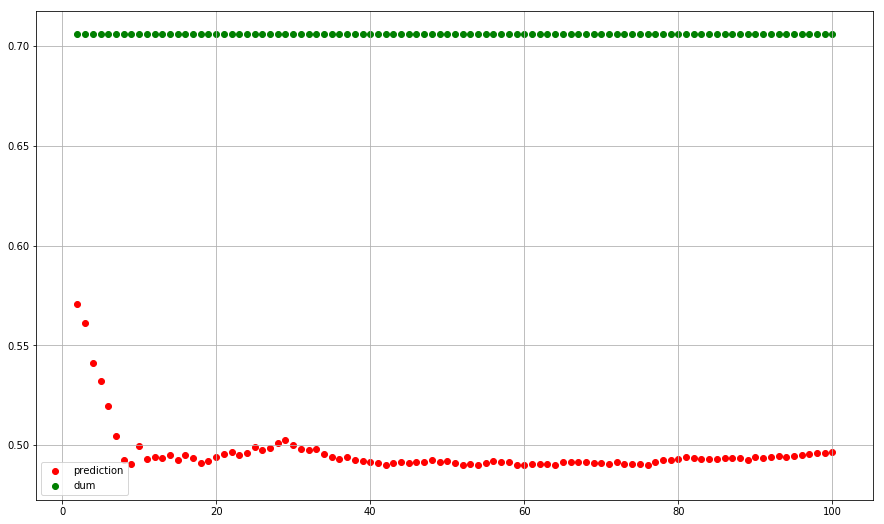

In [15]:
plt.figure(1, figsize=(15, 9))
plt.scatter(range(2,taille+1), msq_pred, color='red', label='prediction')
plt.scatter(range(2,taille+1), msq_dum, color='green', label='dum')
#plt.scatter(range(2,taille+1), msq_random, color='blue', label='random')
plt.legend()
plt.grid('on')

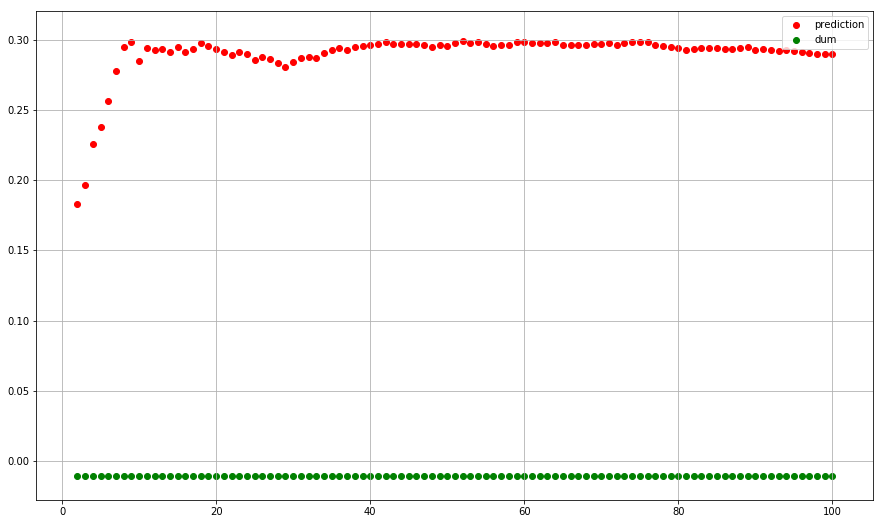

In [13]:
plt.figure(1, figsize=(15, 9))
plt.scatter(range(2,taille+1), r2_pred, color='red', label='prediction')
plt.scatter(range(2,taille+1), r2_dum, color='green', label='dum')
#plt.scatter(range(2,taille+1), r2_random, color='blue', label='random')
plt.legend()
plt.grid('on')

In [9]:
def prediction(p):
    msq_random = []
    msq_dum = []
    msq_pred = []
    
    r2_random = []
    r2_dum = []
    r2_pred = []
    
    for n in range(2,p):
        print("Pour n = ",n)
        # Prédiction aléatoire
        y_pred_random = np.random.randint(np.min(y), np.max(y), y_test.shape)

        # Résultats
        print("MSE aléatoire \t\t: %.2f" % metrics.mean_squared_error(y_test, y_pred_random)) 

        # Prédiction suivant la valeur aléatoire
        dum = dummy.DummyRegressor(strategy='mean')
        dum.fit(X_train_std, y_train)
        y_pred_dum = dum.predict(X_test_std) # Prédiction sur le jeu de test

        # Evaluate
        print("MSE valeur moyenne \t: %.2f" % metrics.mean_squared_error(y_test, y_pred_dum))

        # Algorithme des plus proches voisins
        knn = neighbors.KNeighborsRegressor(n_neighbors=n)
        res = knn.fit(X_train_std, y_train)
        y_pred = knn.predict(X_test_std) # Prédictions des scores suivant les données de départ X

        # Mean Square Error
        print("MSE prédiction \t\t: %.2f\n" % metrics.mean_squared_error(y_test, y_pred))

        # Comparaison des r2
        print("R2 aléatoire \t\t: %.2f" % metrics.r2_score(y_test, y_pred_random))
        print("R2 valeur moyenne \t: %.2f" % metrics.r2_score(y_test, y_pred_dum))
        print("R2 prédiction \t\t: %.2f\n" % metrics.r2_score(y_test, y_pred))

        # Save des résultats
        msq_random.append(metrics.mean_squared_error(y_test, y_pred_random))
        msq_dum.append(metrics.mean_squared_error(y_test, y_pred_dum))
        msq_pred.append(metrics.mean_squared_error(y_test, y_pred))

        r2_random.append(metrics.r2_score(y_test, y_pred_random))
        r2_dum.append(metrics.r2_score(y_test, y_pred_dum))
        r2_pred.append(metrics.r2_score(y_test, y_pred))

    return msq_random, msq_dum, msq_pred, r2_random, r2_dum, r2_pred

In [ ]:
# Création du dictionnaire pour la répresentation graphique
# clé : coordonnées ; valeur : nombre de points à ces coordonnées
sizes = {} 

for (yt, yp) in zip(list(y_test), list(y_pred)):
    if (yt,yp) in sizes :
        sizes[(yt, yp)] += 1
    else:
        sizes[(yt, yp)] = 1

keys = sizes.keys()

# vraie valeur (abscisse)
# valeur predite (ordonnee)
# taille du marqueur
plt.scatter([k[0] for k in keys], [k[1] for k in keys], s=[sizes[k] for k in keys], color='coral')